# Homework 5 (Dev Mody)
## Exercise 2 (Non-Linear Regression)

In this exercise, we work through Example 10.3 in the book based on the dataset `multiple_sine_waves.csv`. We want to fit the data to a set of $B = 2$ parameterized sinosoidal feature transformations:
$$
f_1(x) = sin(w_{1,0} + w_{1,1}\cdot x + w_{1,2}\cdot x_2) \\
f_2(x) = sin(w_{2,0} + w_{2,1}\cdot x + w_{2,2}\cdot x_2)
$$

We will implement this exercise fully in Python. As explained in Section 10.2.3 it is useful to define the following functions

```python
# feature transformation
def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def model(x,w):
    # feature transformation
    f = feature_transforms(x,w[0])
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T
```

Use Gradient Descent with `max_its=2000` and `alpha_choice=10**(0)` and a Least Squares cost to determine the most optimal parameters with minimum cost. List the optimal parameters. Make a plot of the cost function versus iteration. (It’s not required, but if you like you can then try to reproduce the plots in Figure 10.7, which are plots of what exactly?)

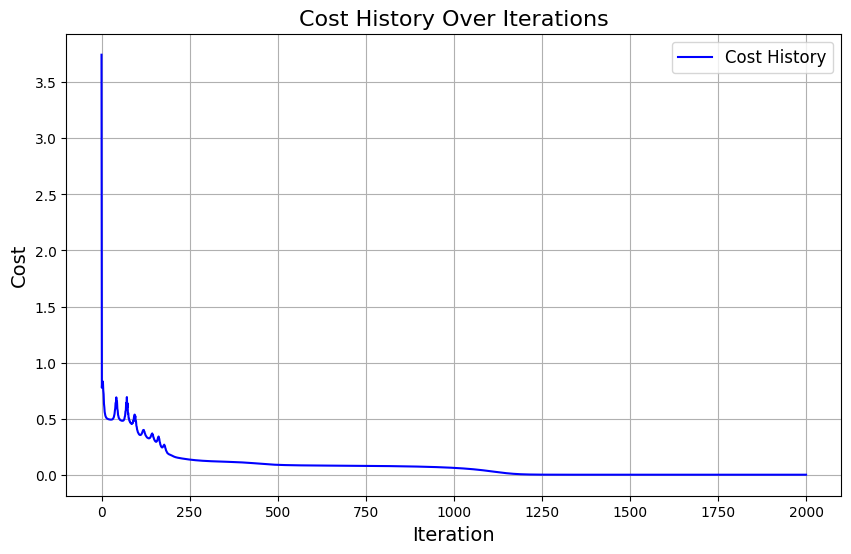

In [1]:

import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
import pandas as pd

def plot_cost_histories (cost_history):
    plt.figure(figsize=(10,6))
    plt.plot(cost_history, label='Cost History', color='blue')
    plt.title('Cost History Over Iterations', fontsize=16)
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()
    

def gradient_descent (g, alpha, max_its, w):
    gradient = grad(g)
    
    weight_history = [w]
    cost_history = [g(w)]
    
    for _ in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

def least_squares(w):
    cost = np.sum((model(x, w) - y)**2)
    return cost/float(np.size(y))

def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T
    
def model(x,w):
    # feature transformation
    f = feature_transforms(x,w[0])
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

csvname = 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

max_its = 2000
alpha_choice = 10**0
w_init= np.random.randn(2,3,2)
weight_history, cost_history = gradient_descent(least_squares,alpha_choice,max_its,w_init)
plot_cost_histories(cost_history)

